<a href="https://colab.research.google.com/github/1070rahul/1070rahul/blob/main/EDA_for_feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Selection: Case study
###(*By Rahul Sati)*
*dated = 25/4/2024*

# About Case study:
 Feature selection is a process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in. Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

# Aim of the Project:
The Aim is to conduct an Exploratory Data Analysis (EDA) to identify and select the most important features that influence the historical cost of a ride.

# Dataset Information:
1. Number_of_Riders: This is an integer column that represents the number of riders.
2. Number_of_Drivers: This is an integer column that represents the number of drivers.
3. Location_Category: This is an object column that represents the category of the location (Urban, Suburban, Rural).
4. Customer_Loyalty_Status: This is an object column that represents the loyalty status of the customer (Silver, Regular).
5. Number_of_Past_Rides: This is an integer column that represents the number of past rides.
6. Average_Ratings: This is a float column that represents the average ratings.
7. Time_of_Booking: This is an object column that represents the time of booking (Night, Evening, Afternoon).
8. Vehicle_Type: This is an object column that represents the type of vehicle (Premium, Economy).
9. Expected_Ride_Duration: This is an integer column that represents the expected ride duration.
10. Historical_Cost_of_Ride: This is a float column that represents the historical cost of the ride.

# Process We can follow while performing EDA for Feature Selection:

1. Begin by getting familiar with the dataset. It includes understanding the size, scope, and nature of the data (structured vs. unstructured), identifying each feature and its type (numerical, categorical), and recognizing the target variable.

2. Identify and handle missing values by imputation, deletion, or estimation, depending on their nature and the proportion of missing data.

3. Analyze the distribution of each feature using histograms, density plots, or bar charts for categorical variables.

4. Conduct correlation analysis using Pearson, Spearman, or Kendall correlation coefficients to assess the relationship between numeric features and the target variable.

5. Utilize scatter plots, pair plots, and heat maps to explore relationships between features.

6. Based on insights gained through EDA, manually remove redundant features, features with very little variance, or features highly correlated with others.

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Loading dataset

In [ ]:
df = pd.read_csv("dynamic_pricing.csv")

Data preprocessing

In [ ]:
# Checking first five rows
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [ ]:
# checking last five rows
df.tail()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048
999,78,63,Rural,Gold,14,4.21,Afternoon,Economy,147,655.065106


In [ ]:
# checking random sample rows
df.sample(5)

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
412,56,29,Urban,Gold,67,4.49,Afternoon,Economy,125,421.817188
353,52,14,Suburban,Gold,97,4.83,Evening,Premium,66,266.977217
151,68,45,Rural,Silver,65,4.19,Evening,Economy,112,323.479109
741,49,20,Rural,Silver,52,4.74,Afternoon,Premium,162,510.626891
956,42,16,Rural,Gold,33,3.63,Morning,Economy,166,513.116128


In [ ]:
# checking the shape of dataset
df.shape

(1000, 10)

This dataset contais 1000 rows and 10 features.

Our goal is to identify the most important features for predicting Historical_cost_of_ride.

In [ ]:
# checking missing values
df.isnull().sum()

Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [ ]:
# check the datatypes of the features
df.dtypes

Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

In [ ]:
# Making a report for missing values and its datatype
mv = df.isnull().sum()
dt = df.dtypes

mv_report = pd.DataFrame({'Missing Values': mv, 'Data Types': dt })
mv_report

,Missing Values,Data Types
Number_of_Riders,0,int64
Number_of_Drivers,0,int64
Location_Category,0,object
Customer_Loyalty_Status,0,object
Number_of_Past_Rides,0,int64
Average_Ratings,0,float64
Time_of_Booking,0,object
Vehicle_Type,0,object
Expected_Ride_Duration,0,int64
Historical_Cost_of_Ride,0,float64


Observation:
- The dataset does not contain any missing values and the data types seems appropriate for each feature.

In [ ]:
# Geting a summary of numerical features

df.describe()

,Number_of_Riders,Number_of_Drivers,Number_of_Past_Rides,Average_Ratings,Expected_Ride_Duration,Historical_Cost_of_Ride
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,60.372000,27.076000,50.031000,4.257220,99.58800,372.502623
std,23.701506,19.068346,29.313774,0.435781,49.16545,187.158756
min,20.000000,5.000000,0.000000,3.500000,10.00000,25.993449
25%,40.000000,11.000000,25.000000,3.870000,59.75000,221.365202
50%,60.000000,22.000000,51.000000,4.270000,102.00000,362.019426
75%,81.000000,38.000000,75.000000,4.632500,143.00000,510.497504
max,100.000000,89.000000,100.000000,5.000000,180.00000,836.116419


In [ ]:
# Geting a summary of Categorical features.
df.describe(include = ['O'])

,Location_Category,Customer_Loyalty_Status,Time_of_Booking,Vehicle_Type
count,1000,1000,1000,1000
unique,3,3,4,2
top,Urban,Silver,Night,Premium
freq,346,367,276,522


##Univariate analysis

In [ ]:
# Checking column names which are numeric using lambda function.
df.columns[df.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))]

Index(['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
       'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride'],
      dtype='object')

In [ ]:
# or other way of checking the name of numerical columns without using lambda func.
df.select_dtypes(include = 'number').columns

Index(['Number_of_Riders', 'Number_of_Drivers', 'Number_of_Past_Rides',
       'Average_Ratings', 'Expected_Ride_Duration', 'Historical_Cost_of_Ride'],
      dtype='object')

In [ ]:
# checking the name of categorical columns
df.select_dtypes(include = 'O').columns

Index(['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking',
       'Vehicle_Type'],
      dtype='object')

In [ ]:
# Perform univariate analysis
# define the numerical and categorical columns
numerical_cols = ['Number_of_Riders', 'Number_of_Drivers',
                'Number_of_Past_Rides','Average_Ratings',
                'Expected_Ride_Duration', 'Historical_Cost_of_Ride']

categorical_cols = ['Location_Category', 'Customer_Loyalty_Status',
                    'Time_of_Booking','Vehicle_Type']

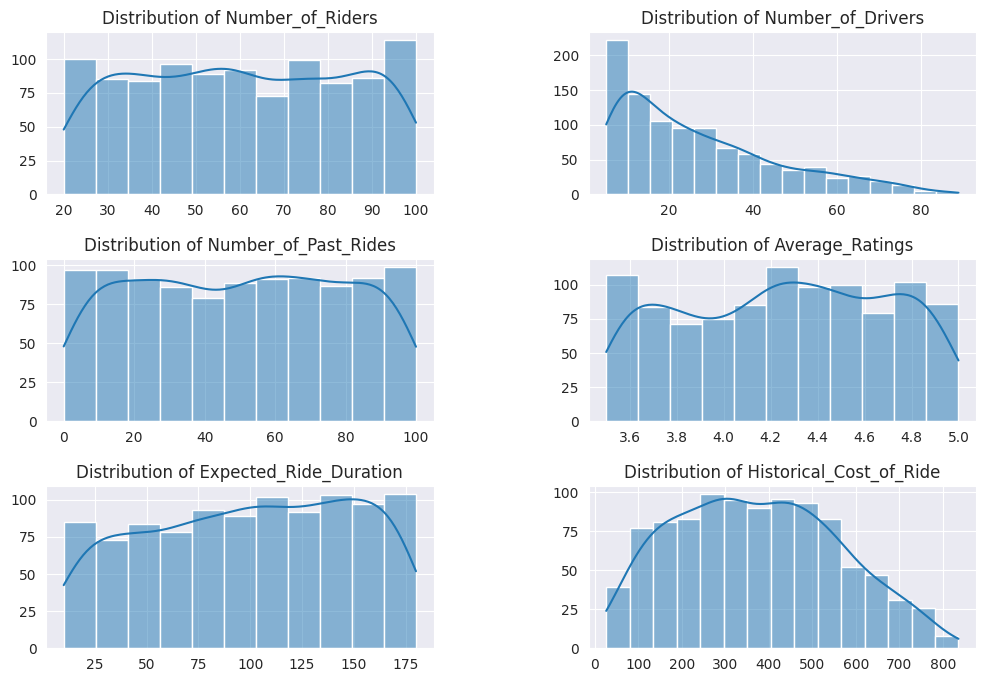

In [ ]:
#plotting distribution for numerical features
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12,8))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, col in enumerate(numerical_cols):
  sns.histplot(df[col], kde = True, ax=axes[i//2, i%2])
  axes[i//2, i%2].set_title(f'Distribution of {col}')
  axes[i//2, i%2].set_xlabel('')
  axes[i//2, i%2].set_ylabel('')

Observatoins: The distribution for the numerical features provide the following insights.

1. Number_of_Riders - The distribution is fairly uniform, with values ranging from 20 to 100 riders. It suggests a wide variation of numnbr of riders per ride.

2. Number_of_Drivers - It is skewed towards lower numbers, indicating that there are fewer drivers available compared to riders.

3. Number_of_Past_Rides - It is fairly even, though slightly skewed towards lower values. Indicates variablility in cutomer expefience with the service.

4. Average_Ratings - Mean rating is around 4.26, indicating positive feedback from cutomers. The minimum rating is 3.5 and the maximum is 5.

5. Expected_ride_duration - Ride duration varies from 10 to 180 minutes, with average duration of approx 99.59 minutes.

6. Historical_Cost_of_Ride - The cost varies from 26 to 836 units, with an average of 372.50. Skewed towards right, indicating most rides cost less than the mean.

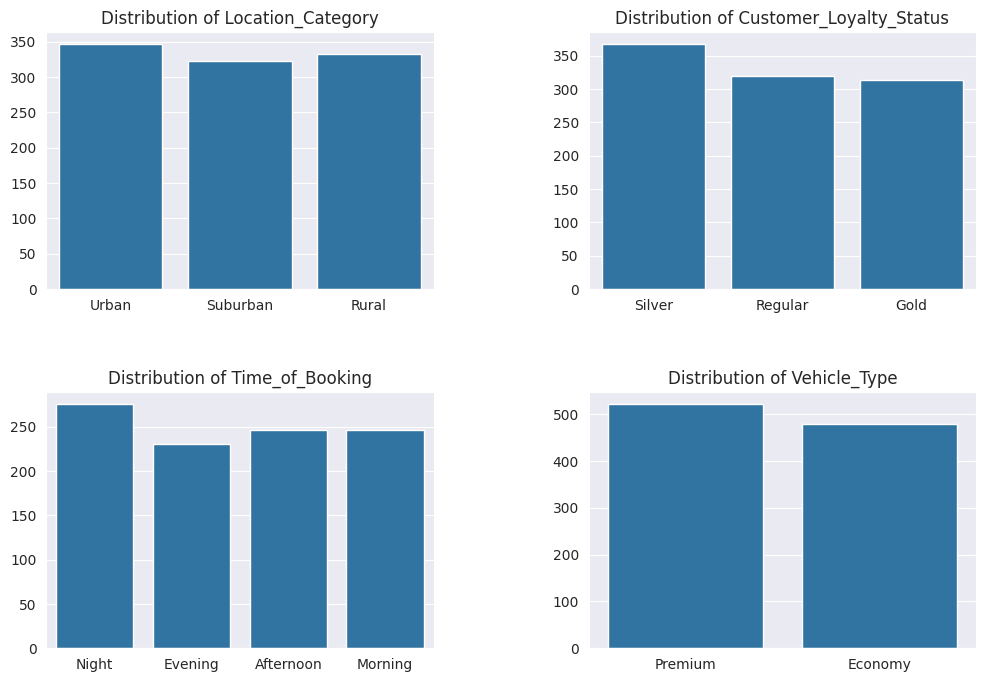

In [ ]:
# plotting distribution for categorical features

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)

for i, col in enumerate(categorical_cols):
  sns.countplot(data = df, x = col, ax = axes[i//2, i%2])
  axes[i//2,i%2].set_title(f'Distribution of {col}')
  axes[i//2,i%2].set_xlabel('')
  axes[i//2,i%2].set_ylabel('')

Observation: The distribution for the categorical features provide following insights.

1. Location_category - It shows a variation with Urban likely the most common, followed by suburban and rural categories. It suggests that location category could impact the cost of rides.

2. Cutomer_loyalty_Status - It shows that silver has higher loyalty status.

3. Time_Of_Booking - Most of the bookings happens at night

4. Vehicle_type - There's a distribution across different vehicle types, such as "Premium" and "Morning".

# Bivariate Analysis

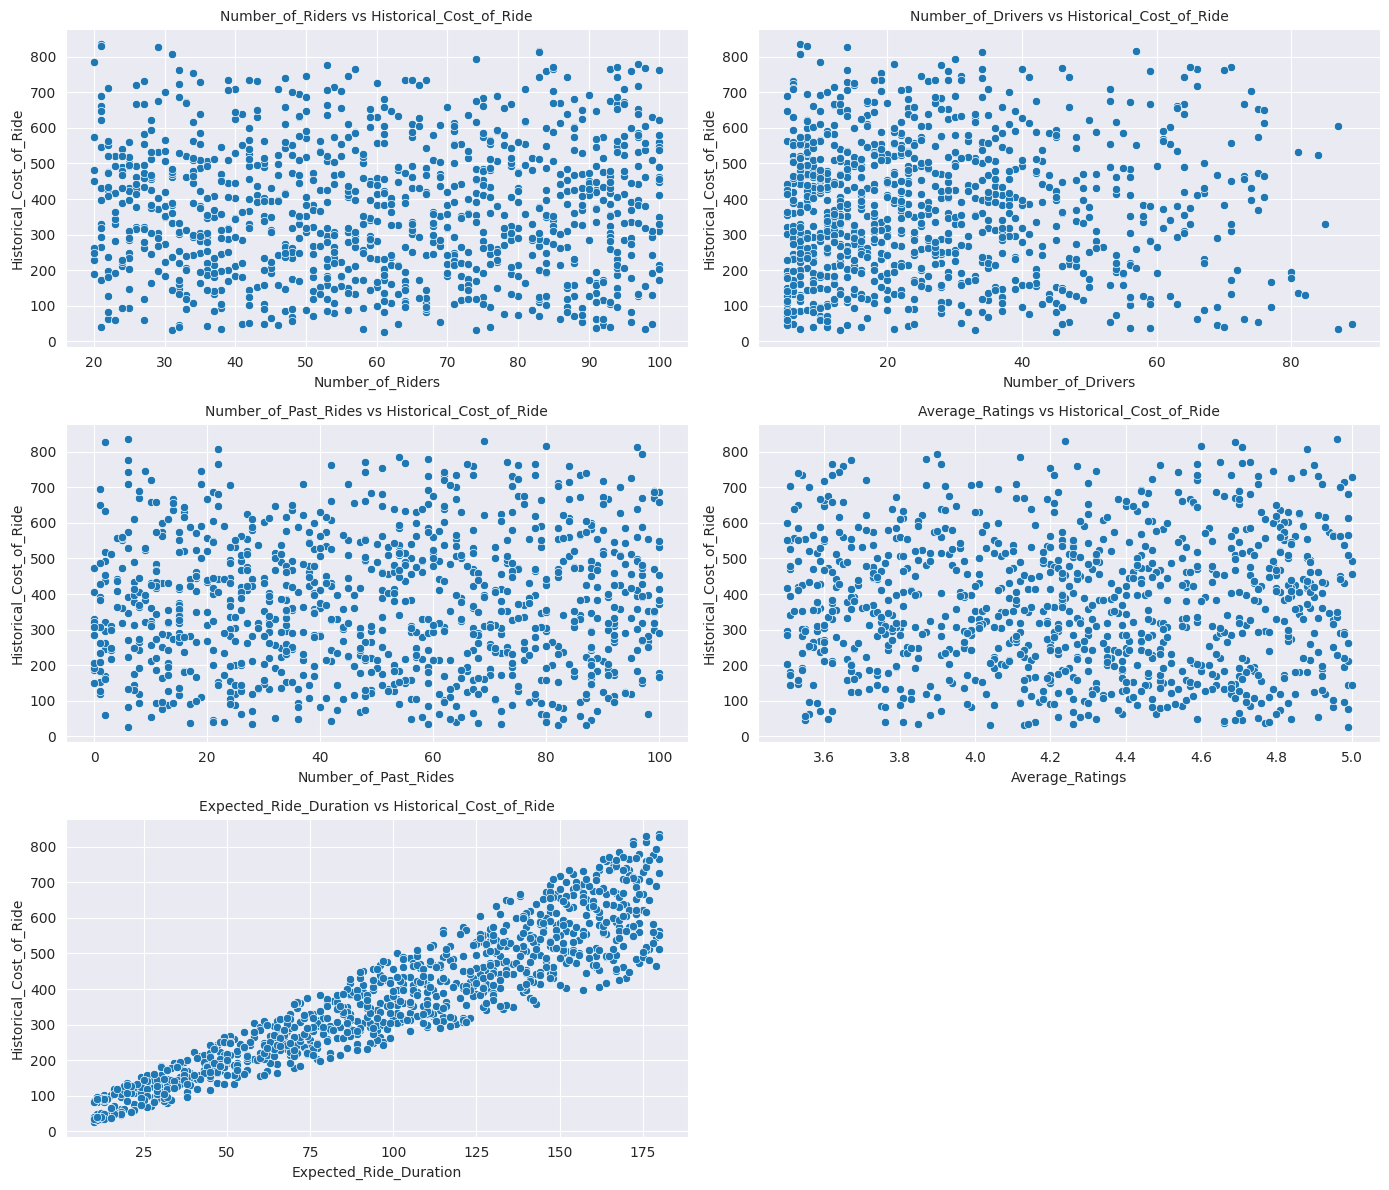

In [ ]:
num_plots = len(numerical_cols[:-1])
n_cols = 2
n_rows = (num_plots + 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, n_rows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

axes = axes.flatten()

# plot each numerical column against the historical cost.
for i, col in enumerate(numerical_cols[:-1]):
    sns.scatterplot(data=df, x=col, y='Historical_Cost_of_Ride', ax=axes[i])
    axes[i].set_title(f'{col} vs Historical_Cost_of_Ride', fontsize=10)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Historical_Cost_of_Ride')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Observations:

1. Number_of_Riders: There does not appear to be a clear linear relationship between the number of riders and the cost of the ride. The distribution of points is quite scattered, suggesting that while the number of riders may influence the cost, it is not a straightforward linear relationship.

2. Number_of_Drivers: Similar to the number of riders, the number of drivers available does not show a clear linear relationship with the ride cost. It indicates that while driver availability might affect pricing dynamics, it does not do so in a simple, direct manner.

3. Number_of_Past_Rides: There’s no evident linear relationship between the number of past rides a customer has had and the cost of their rides. It suggests that customer loyalty, as measured by the number of past rides, does not directly influence the cost of rides linearly.

4. Average_Ratings: The scatter plot does not indicate a strong linear relationship between average ratings and ride cost. While we might have expected higher-rated drivers or customers to be associated with higher costs, the data does not support this.

5. Expected_Ride_Duration: There seems to be a more noticeable relationship here, with a potential trend indicating that longer expected ride durations are associated with higher costs. It is intuitive, as longer rides would naturally cost more.

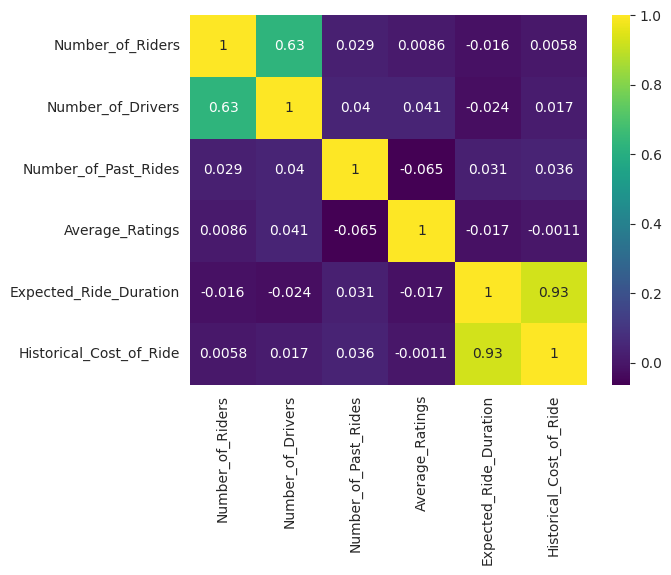

In [ ]:
# Check the correlation between numerical features
corr = df[['Number_of_Riders', 'Number_of_Drivers',
                'Number_of_Past_Rides','Average_Ratings',
                'Expected_Ride_Duration', 'Historical_Cost_of_Ride']].corr()
sns.heatmap(corr, annot=True, cmap='viridis')
plt.show()

## *Expected_Ride_Duration stands out as a numerical feature with a more discernible relationship to the Historical_Cost_of_Ride. The other numerical features do not show clear linear relationships with the ride cost, but they might still contribute information in combination with other features or through non-linear relationships.*

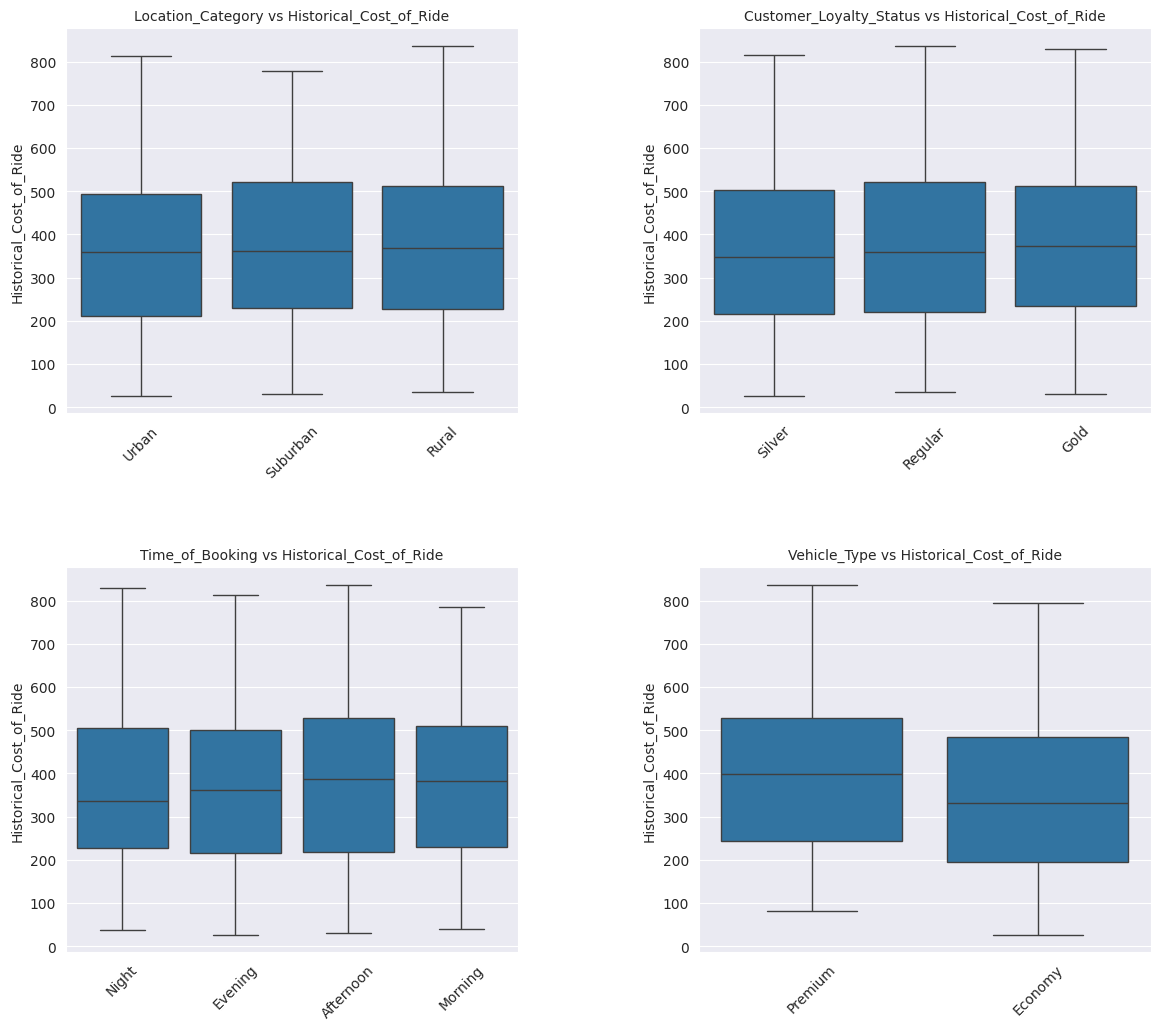

In [ ]:
# bivariate Analysis: categorical features vs historical_cost_of_ride
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(categorical_cols):
    sns.boxplot(data=df, x=col, y='Historical_Cost_of_Ride', ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{col} vs Historical_Cost_of_Ride', fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('Historical_Cost_of_Ride')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

## Observations:

1. Location_Category: Ride costs vary by location category, with Urban locations showing a wider range and potentially higher median costs compared to other areas. It suggests that location plays a crucial role in determining ride costs, likely due to differences in demand, availability, and operational costs.

2. Customer_Loyalty_Status: There are noticeable differences in ride costs based on the loyalty status of the customer. The variability in costs suggests that loyalty status could influence pricing, possibly through loyalty discounts or perks for higher-status customers.

3. Time_of_Booking: The time of booking also impact ride costs, with certain times of day showing different cost distributions. It could reflect demand variations throughout the day, with peak times potentially commanding higher prices.

4. Vehicle_Type: Premium vehicles generally have higher costs compared to Economy vehicles, indicating that vehicle type is a critical factor in pricing.

# Conclusion

Based on the EDA, the following features are identified as potentially important for predicting ride costs:

1. Expected_Ride_Duration: Shows a clear relationship with ride cost.
2. Location_Category: Significant variance in costs by location.
3. Customer_Loyalty_Status: Variability in costs suggests an impact on pricing.
4. Time_of_Booking: Variations in costs indicate an influence of demand at different times.
5. Vehicle_Type: Directly influences cost with clear distinctions between vehicle types.